# Data Import

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np

In [3]:
amazon_df_train = pd.read_csv('data/dataset_amazon_train.csv')
amazon_df_test = pd.read_csv('data/dataset_amazon_test.csv')
#amazon_df_train = pd.read_csv('/Users/.../Desktop/dataset_amazon_train.csv')
#amazon_df_test = pd.read_csv('/Users/.../Desktop/dataset_amazon_test.csv')

In [4]:
amazon_df_train.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
amazon_df_train = pd.DataFrame(data=amazon_df_train, columns=['Score', 'Text'])
amazon_df_test = pd.DataFrame(data=amazon_df_test, columns=['Score', 'Text'])

In [6]:
amazon_df_train[40:43]

,Score,Text
40,5,The variety packs taste great!<br /><br />I ha...
41,5,McCann's makes oatmeal for every oatmeal conno...
42,5,I have McCann's Oatmeal every morning and by o...


# Text Preprocessing
Recap:<br> 
**Sparsity:** In text mining, huge matrices are created based on word frequencies with many cells having zero values. This problem is called sparsity and is minimized using various techniques.<br> 


Text pre-processing can be divided into two broad categories — noise removal & normalization. Data components that are redundant to the core text analytics can be considered as noise.


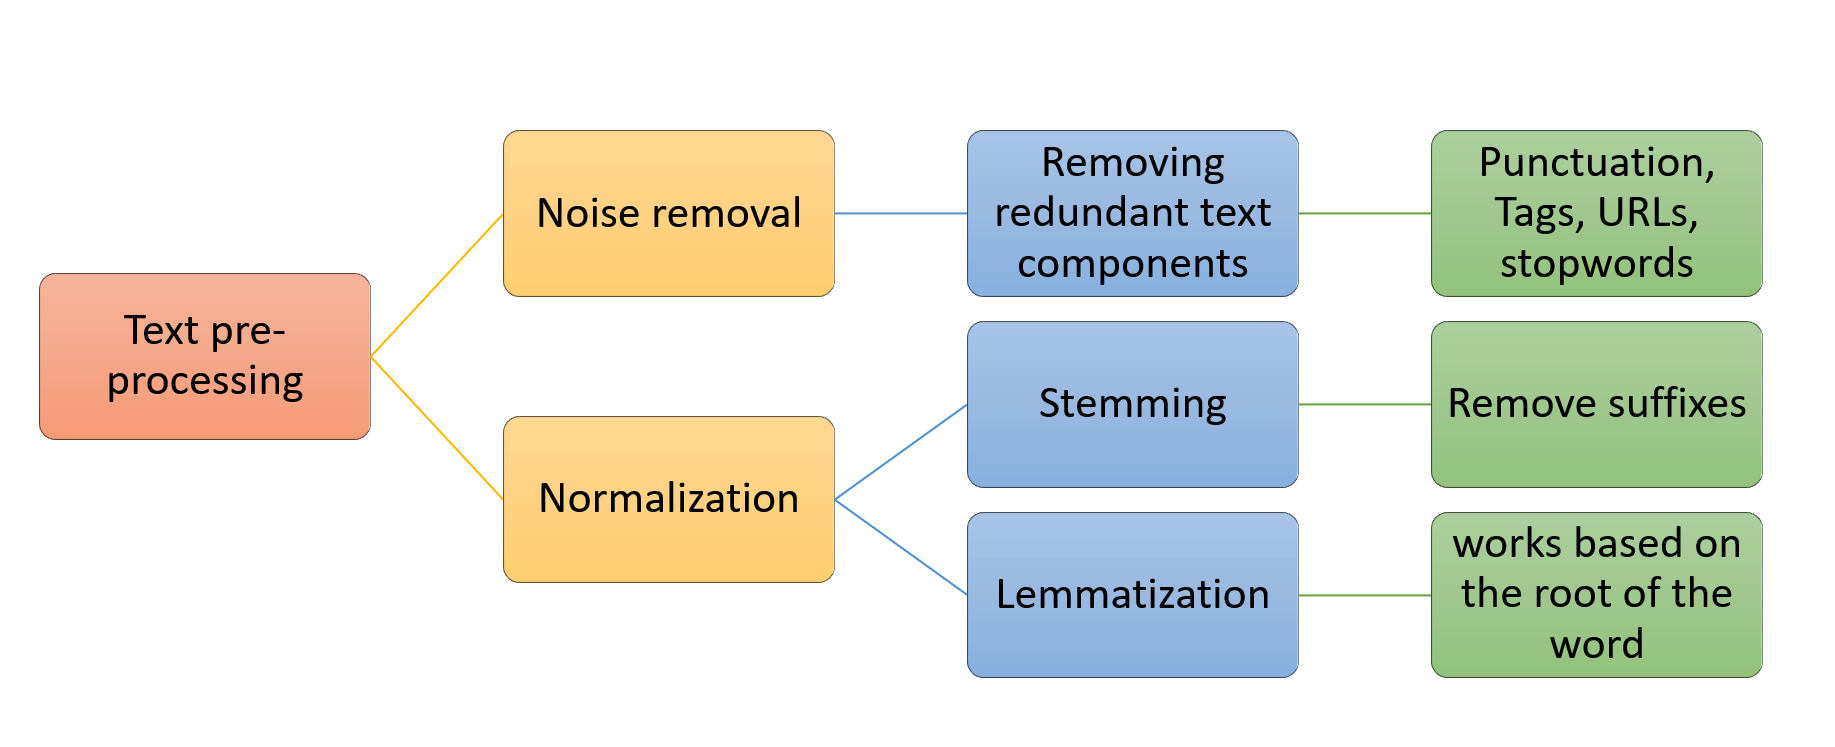



Handling multiple occurrences / representations of the same word is called normalization. There are two types of normalization — stemming and lemmatization. Let us consider an example of various versions of the word learn — learn, learned, learning, learner. Normalisation will convert all these words to a single normalised version — “learn”. <br> 

**Stemming**: normalizes text by removing suffixes.<br> 
**Lemmatisation:** is a more advanced technique which works based on the root of the word.


# Data Cleaning

In [7]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [9]:
from tqdm import tqdm
def clean(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        text = re.sub("br", "", text)
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #Stemming
        if stemmer:
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [10]:
updates = clean(amazon_df_train['Text'], lemmatize = True, stemmer = False)

100%|██████████████████████████████████| 75000/75000 [00:06<00:00, 11058.45it/s]


In [11]:
updates[40]

'variety pack taste great every morning cent per meal understand everyone earth buying stuff maple sugar terrific followed apple cinnamon followed regular get tired ole thing taste great boil water small pot empty packet bowl pour boiling water watch expand x size taste really good take minute prepare sure everyone earth convenient healthy quick excellent quality extremely cheap'

In [12]:
amazon_df_train['Text'][40]

"The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."

In [13]:
amazon_df_train['Cleaned_Text'] = updates

In [14]:
amazon_df_train.head()

,Score,Text,Cleaned_Text
0,5,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,4,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,2,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


# Define training features - Bag of Words (Bow)
Each word is a feature. Our feature space is defined by our vocabulary. Documents/pieces of text will be represented as sparse vectors.

In [15]:
#!pip install sklearn

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#CountVectorizer?

### Create BoW from train corpus

In [18]:
bow = CountVectorizer(binary=True)
X = bow.fit_transform(amazon_df_train["Cleaned_Text"])

In [19]:
X

<75000x41899 sparse matrix of type '<class 'numpy.int64'>'
	with 2456624 stored elements in Compressed Sparse Row format>

In [20]:
amazon_df_train['Cleaned_Text'][0]

'bought several vitality canned dog food product found good quality product look like stew processed meat smell better laador finicky appreciates product better'

In [21]:
df_bow = pd.DataFrame(X[0].T.todense(), index=bow.get_feature_names_out(), columns=["Bag-of-words"])
df_bow = df_bow.sort_values('Bag-of-words', ascending=False)
print (df_bow.head(25))

             Bag-of-words
quality                 1
found                   1
bought                  1
appreciates             1
look                    1
processed               1
food                    1
smell                   1
better                  1
product                 1
stew                    1
finicky                 1
good                    1
dog                     1
canned                  1
like                    1
meat                    1
several                 1
laador                  1
vitality                1
popularly               0
por                     0
popsicle                0
poptart                 0
poptarts                0


In [22]:
print(X[10, 2000:3000].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
print(bow.get_feature_names_out()[2000:20022])

['arte' 'artemis' 'artery' ... 'knawing' 'knd' 'knead']


# Define labels

In [24]:
y = np.array(amazon_df_train['Score'])

In [25]:
y[0:10]

array([5, 1, 4, 2, 5, 4, 5, 5, 5, 5])

In [26]:
len(y)

75000

# Train Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#KNeighborsClassifier?

In [29]:
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

In [30]:
modelknn.fit(X,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

# Predict with 2 examples

In [31]:
test_sentences = ['The restaurant is good.', "Terrible restaurant!"]

### Preprocess

In [32]:
test_clean = clean(test_sentences, lemmatize = True, stemmer = False)

100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 10645.44it/s]


In [33]:
test_clean

['restaurant good', 'terrible restaurant']

### Transform into vectors - apply BoW

In [34]:
test = bow.transform(test_sentences)

In [35]:
test.shape

(2, 41899)

### Predict - apply KNN

In [36]:
predict = modelknn.predict(test)

In [37]:
predict

array([5, 1])

In [38]:
for review, score in zip(test_sentences, predict):
    print(f'The predicted score for the review: "{review}", is {score}.')

The predicted score for the review: "The restaurant is good.", is 5.
The predicted score for the review: "Terrible restaurant!", is 1.


# Predict for Test corpus

In [39]:
amazon_df_test['Cleaned_Text'] = clean(amazon_df_test['Text'], lemmatize = True, stemmer = False)

100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 11377.20it/s]


In [40]:
X_test = bow.transform(amazon_df_test['Cleaned_Text'])
y_test = np.array(amazon_df_test['Score'])

In [41]:
y_pred = modelknn.predict(X_test)

# Evaluate

In [42]:
from sklearn.metrics import classification_report

In [43]:
labels = {"Very Bad":1, "Bad":2, "Neutral":3, "Good":4, "Very Good":5}
print(classification_report(y_pred, y_test, target_names = labels.keys()))

              precision    recall  f1-score   support

    Very Bad       0.21      0.69      0.33       145
         Bad       0.09      0.42      0.15        59
     Neutral       0.09      0.46      0.16        74
        Good       0.13      0.39      0.19       214
   Very Good       0.97      0.69      0.81      4508

    accuracy                           0.67      5000
   macro avg       0.30      0.53      0.33      5000
weighted avg       0.89      0.67      0.75      5000



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 100,   18,    8,    5,   14],
       [  11,   25,    8,    9,    6],
       [  12,    7,   34,    3,   18],
       [  18,   21,   25,   84,   66],
       [ 329,  212,  283,  566, 3118]])

/var/folders/bv/9rbc9m815x7_jtdrj1yms35c0000gn/T/ipykernel_12371/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


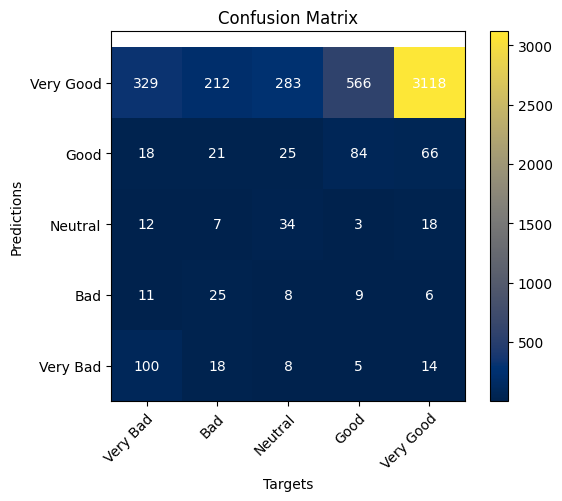

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred, y_test), labels.keys())

# TF-IDF features
As we have seen in the previous lessons the deficiency of a mere word count obtained from the CountVectorizer is that, large counts of certain common words may dilute the impact of more context specific words in the corpus. This is overcome by the TF-IDF vectorizer which penalizes words that appear several times across the document. TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.

<br> For that reason, the next step of refining the word counts using the TF-IDF vectorizer.

**Note:** With the TfidfTransformer from sklearn we can also use the previous CountVectorizer matrix and convert it into a TF-IDF matrix. 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf = TfidfVectorizer()

In [48]:
#tfidf?

In [49]:
X = tfidf.fit_transform(amazon_df_train["Cleaned_Text"])

In [50]:
X[0]

<1x41899 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [51]:
df = pd.DataFrame(X[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

               TF-IDF
appreciates  0.366226
vitality     0.342119
laador       0.335875
product      0.290021
stew         0.282393
finicky      0.268868
better       0.253448
processed    0.240388
canned       0.209595
meat         0.196894
several      0.174616
look         0.165403
smell        0.164069
quality      0.154745
bought       0.139438
found        0.137183
dog          0.134697
food         0.121813
good         0.090259
like         0.083961
popularized  0.000000
popularity   0.000000
popularly    0.000000
populate     0.000000
popular      0.000000


# Train Classifier

In [52]:
modelknn2 = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

In [53]:
modelknn2.fit(X,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

# Predict for Test corpus

In [54]:
X_test = tfidf.transform(amazon_df_test['Cleaned_Text'])
y_test = np.array(amazon_df_test['Score'])

In [55]:
y_pred = modelknn2.predict(X_test)

# Evaluate

In [56]:
labels = {"Very Bad":1, "Bad":2, "Neutral":3, "Good":4, "Very Good":5}
print(classification_report(y_pred, y_test, target_names = labels.keys()))

              precision    recall  f1-score   support

    Very Bad       0.24      0.53      0.33       212
         Bad       0.07      0.37      0.12        57
     Neutral       0.11      0.38      0.17        99
        Good       0.13      0.32      0.18       266
   Very Good       0.94      0.70      0.80      4366

    accuracy                           0.66      5000
   macro avg       0.30      0.46      0.32      5000
weighted avg       0.84      0.66      0.73      5000



In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 112,   25,   24,   17,   34],
       [   9,   21,    7,    8,   12],
       [  10,    5,   38,   23,   23],
       [  27,   19,   22,   84,  114],
       [ 312,  213,  267,  535, 3039]])

/var/folders/bv/9rbc9m815x7_jtdrj1yms35c0000gn/T/ipykernel_12371/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


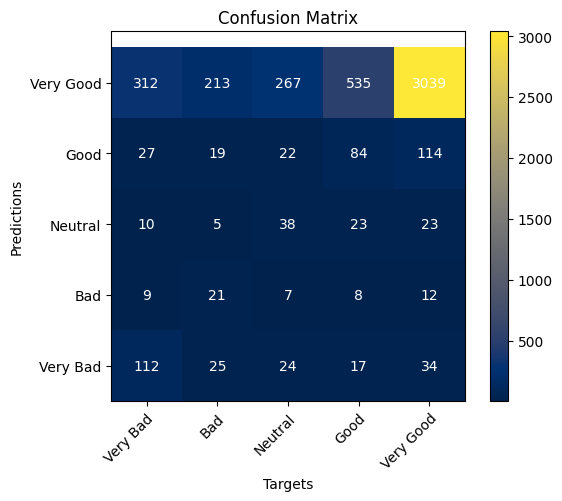

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred, y_test), labels.keys())